In [10]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import sys

In [19]:
def calculate_velocity_com(atoms_velocities, number_atoms):
    return np.sum(atoms_velocities, axis=0)/number_atoms

def calculate_kinetic_energy(atoms_velocities, number_atoms, number_dimensions):
    kinetic_energy = 0
    for dim in np.arange(number_dimensions): 
        kinetic_energy += np.sum(atoms_velocities[:, dim]**2)
    return kinetic_energy/number_atoms

def calculate_sfac(kinetic_energy, T):
    return np.sqrt(3*T/kinetic_energy)

def calculate_r(position_i, positions_j, number_atoms, box_size, number_dimensions):
    rij2 = np.zeros(number_atoms)
    rij = (np.remainder(position_i - positions_j + box_size/2., box_size) - box_size/2.).T
    for dim in np.arange(number_dimensions):
        rij2 += np.power(rij[dim, :], 2)
    return np.sqrt(rij2)

def calculate_potential_energy(atoms_positions, number_atoms, box_size, number_dimensions, sigma, epsilon):
    energy_potential = 0
    for position_i in atoms_positions:
        r = calculate_r(position_i, atoms_positions, number_atoms, box_size, number_dimensions)
        energy_potential_i = np.sum(4*epsilon*(np.power(sigma/r[r>0], 12)-np.power(sigma/r[r>0], 6)))
        energy_potential += energy_potential_i
    return energy_potential / 2

def monte_carlo_move(atoms_positions, number_atoms, box_size, number_dimensions, sigma, epsilon, delta_mc):
    potential_energy = calculate_potential_energy(atoms_positions, number_atoms, box_size, number_dimensions, sigma, epsilon)
    trial_atoms_positions = copy.deepcopy(atoms_positions)
    atom_id = np.random.randint(number_atoms)
    trial_atoms_positions[atom_id] += (np.random.random(3)-0.5)*delta_mc
    trial_potential_energy = calculate_potential_energy(trial_atoms_positions, number_atoms, box_size, number_dimensions, sigma, epsilon)
    acceptation_probability = np.min([1, np.exp(trial_potential_energy-potential_energy)])
    if np.random.random() <= acceptation_probability:
        atoms_positions = trial_atoms_positions
        potential_energy = trial_potential_energy
        print("accepted move, atom id", atom_id, potential_energy)
    else:
        print("rejected move, atom id", atom_id, potential_energy, trial_potential_energy)
    return atoms_positions, potential_energy

In [23]:
number_atoms = 10
number_dimensions = 3
T = 1.0
dt = 0.005
box = np.array([6, 6, 6])
LJ_cutoff = 3
delta_dump = 10
Lx, Ly, Lz = 10, 10, 10
epsilon = 1
sigma = 1
delta_mc = 0.5
maximum_steps = 50000

box_size = np.zeros(3)
box_size = np.array([Lx, Ly, Lz])

# xlo, xhi = -Lx/2, Lx/2
# ylo, yhi = -Ly/2, Ly/2
# zlo, zhi = -Lz/2, Lz/2

# initialise positions and velocities
#x, y, z = np.zeros((3,n_atoms))
#xm, ym, zm = np.zeros((3,n_atoms))
#vx, vy, vz = np.zeros((3,n_atoms))

atoms_positions = np.zeros((number_atoms, 3))
atoms_velocities = np.zeros((number_atoms, 3))

for dim in np.arange(number_dimensions):
    atoms_positions[:, dim] = np.random.random(number_atoms)*box_size[dim] - box_size[dim]/2
    atoms_velocities[:, dim] = np.random.random(number_atoms) - 0.5

velocity_com = calculate_velocity_com(atoms_velocities, number_atoms)
kinetic_energy = calculate_kinetic_energy(atoms_velocities, number_atoms, number_dimensions)

MC

accepted move, atom id 3 -0.2631214466765518
accepted move, atom id 6 -0.2127058570520365
accepted move, atom id 6 -0.36734141894546146
accepted move, atom id 2 -0.371281160991587
accepted move, atom id 1 -0.3705238820153622
accepted move, atom id 4 -0.37185925397235253
accepted move, atom id 2 -0.3670340220419218
accepted move, atom id 5 -0.36743650732830363
accepted move, atom id 3 -0.3678371781211842
accepted move, atom id 9 -0.364692682759491
accepted move, atom id 1 -0.36431530051408434
accepted move, atom id 5 -0.36369080637756185
accepted move, atom id 7 -0.4463262319402905
accepted move, atom id 8 -0.44619865773302797
accepted move, atom id 4 -0.4487857223982008
accepted move, atom id 0 -0.4493521455208848
accepted move, atom id 4 -0.459169272106828
accepted move, atom id 6 -0.35317407067376483


accepted move, atom id 5 -0.3531411107970372
accepted move, atom id 3 -0.3527900341940478
accepted move, atom id 1 -0.3562736360676063
accepted move, atom id 0 -0.3572528566650648
accepted move, atom id 7 -0.2186744672410199
accepted move, atom id 9 -0.2349468236062278
accepted move, atom id 4 -0.24668084509236649
accepted move, atom id 8 -0.24688464946509459
accepted move, atom id 6 -0.1708642740943787
accepted move, atom id 3 -0.17095420747223303
accepted move, atom id 3 -0.17098788562595293
accepted move, atom id 6 -0.1943741044833419
accepted move, atom id 1 -0.19508241379088975
accepted move, atom id 5 -0.1946294994352477
accepted move, atom id 6 -0.21248434758174742
accepted move, atom id 4 -0.22311647322841535
accepted move, atom id 9 -0.24233787482487423
accepted move, atom id 5 -0.2429124291112773
accepted move, atom id 3 -0.24290905857172537
accepted move, atom id 0 -0.24069884255687293
accepted move, atom id 5 -0.2400224352194078
accepted move, atom id 7 -0.20052543821272278

/tmp/ipykernel_3634/920772557.py:34: RuntimeWarning: overflow encountered in exp
  acceptation_probability = np.min([1, np.exp(trial_potential_energy-potential_energy)])


accepted move, atom id 1 238951.9820305846
accepted move, atom id 8 238951.98205068818
accepted move, atom id 0 238951.98206151844
accepted move, atom id 6 238951.98224609165
accepted move, atom id 1 238951.98137289792
accepted move, atom id 0 238951.9812749843
accepted move, atom id 4 238951.98094846736
accepted move, atom id 5 238951.98072707365
accepted move, atom id 9 238951.98077410558
accepted move, atom id 6 238951.98070789775
accepted move, atom id 9 238951.98085456667
accepted move, atom id 9 238951.98101127695
accepted move, atom id 9 238951.98098365907
rejected move, atom id 2 238951.98098365907 23140.054494173193
accepted move, atom id 3 238951.98137396123
accepted move, atom id 3 238951.98171514863
rejected move, atom id 2 238951.98171514863 17842.602287730024
accepted move, atom id 0 238951.9816495513
accepted move, atom id 3 238951.98204052047
accepted move, atom id 3 238951.9824102075
accepted move, atom id 6 238951.98119708535
accepted move, atom id 4 238951.9846596865

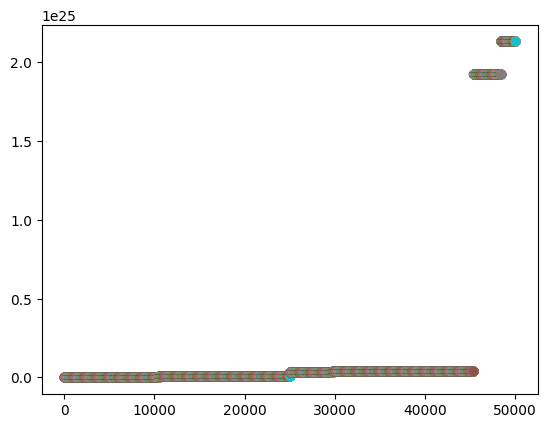

In [24]:
for time in range(maximum_steps):
    atoms_positions, potential_energy = monte_carlo_move(atoms_positions, number_atoms, box_size, number_dimensions, sigma, epsilon, delta_mc)
    plt.plot(time, potential_energy, 'o')

In [9]:
atoms_positions[0]

array([-0.67601652,  4.89881099,  1.24143074])

1.0

True

In [ ]:
sys.path.append("functions")
from initialization import initialization

In [ ]:






initialization(n_atoms, T, dt, Lx, Ly, Lz)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
#import nglview as nv
#import MDAnalysis as mda
from numpy.linalg import norm
# https://userguide.mdanalysis.org/stable/examples/constructing_universe.html

In [ ]:
# put everything in a universe
#Nres = Npart
#resIndices = np.repeat(range(Nres), 1)
#segIndices = [0] * Nres
#sol = mda.Universe.empty(Npart,
#                         n_residues = Nres,
#                         atom_resindex = resIndices,
#                         residue_segindex=segIndices,
#                         trajectory = True)
#sol.add_TopologyAttr('name', ['A1']*Nres)
#coordinates = np.array([x,y,z]).T
#assert coordinates.shape == (Npart, 3)
#sol.atoms.positions = coordinates

In [ ]:
def initialization(Npart, T, dt, Lx, Ly, Lz):
    
    xlo, xhi = -Lx/2, Lx/2
    ylo, yhi = -Ly/2, Ly/2
    zlo, zhi = -Lz/2, Lz/2  

    # initialise positions and velocities
    x, y, z = np.zeros((3,Npart))
    xm, ym, zm = np.zeros((3,Npart))
    vx, vy, vz = np.zeros((3,Npart)) 

    for N in range(Npart):
        x[N] = random.random()*Lx+xlo
        y[N] = random.random()*Ly+ylo
        z[N] = random.random()*Lz+zlo
    
    vcom = np.zeros(3)
    ekin = 0
    for N in range(Npart):
        vx[N] = random.random()-0.5
        vy[N] = random.random()-0.5
        vz[N] = random.random()-0.5
        vcom += vx[N], vy[N], vz[N]
        ekin += vx[N]**2 + vy[N]**2 + vz[N]**2

    vcom /= Npart
    ekin /= Npart
    sfac = np.sqrt(3*T/ekin)

    for N in range(Npart):
        vx[N] = (vx[N]-vcom[0])*sfac
        vy[N] = (vy[N]-vcom[1])*sfac
        vz[N] = (vz[N]-vcom[2])*sfac
        xm[N] = x[N] - vx[N]*dt
        ym[N] = y[N] - vy[N]*dt
        zm[N] = z[N] - vz[N]*dt

    return x, y, z, vx, vy, vz, xm, ym, zm

In [ ]:
def evalforce(Npart, x, y, z, Lx, Ly, Lz, cutoff):

    forces = np.zeros((Npart,3))
    box = np.array([Lx,Ly,Lz])
    for Ni in range(Npart-1):
        posi = np.array([x[Ni],y[Ni],z[Ni]])
        for Nj in np.arange(Ni+1,Npart):
            posj = np.array([x[Nj],y[Nj],z[Nj]])
            dij = np.remainder(posi - posj + box/2., box) - box/2.
            rij = norm(dij)
            if rij < cutoff:
                LJf = 48*1/rij**2*1/rij**6*(1/rij**6-0.5)
                forces[Ni] += LJf*dij
                forces[Nj] -= LJf*dij
    return forces

In [ ]:
def equationsmotions(x,y,z,forces):
    velx, vely, velz = 0, 0, 0
    velx2, vely2, velz2 = 0, 0, 0
    for Ni in range(Npart):
        xx = 2*x[Ni]-xm[Ni]+dt**2*forces[Ni][0]
        yy = 2*y[Ni]-ym[Ni]+dt**2*forces[Ni][1]
        zz = 2*z[Ni]-zm[Ni]+dt**2*forces[Ni][2]

        vx = (xx-xm[Ni]) / (2*dt)
        vy = (yy-ym[Ni]) / (2*dt)
        vz = (zz-zm[Ni]) / (2*dt)
        
        velx += vx
        vely += vy
        velz += vz

        velx2 += vx**2
        vely2 += vy**2
        velz2 += vz**2  
 
        xm[Ni] = x[Ni]
        ym[Ni] = y[Ni]
        zm[Ni] = z[Ni]
        
        x[Ni] = xx
        y[Ni] = yy
        z[Ni] = zz
        
    T = (velx2+vely2+velz2)/3/Npart
    etot = 0.5*(velx2+vely2+velz2)/Npart
    return x, y, z, T, etot

In [ ]:
# choose number of particles
Npart = 50
# choose a temperature
T = 1.0
# choose a timestep
dt = 0.005
# set box size
Lx = 20
Ly = 20
Lz = 20
# choose cut-off
cutoff = 3

x, y, z, vx, vy, vz, xm, ym, zm = initialization(Npart, T, dt, Lx, Ly, Lz)
for t in range(1000):
    forces = evalforce(Npart, x, y, z, Lx, Ly, Lz, cutoff)
    x, y, z, T, etot = equationsmotions(x,y,z,forces)
    
    if t%10 == 0:
        if t == 0:
            trajectory = ''
        trajectory += str(len(x)) + '\ntitle\n'
        for i in range(len(x)):
            trajectory += ' '.join(['Ar',str(x[i]),str(y[i]),str(z[i]),'\n'])

In [ ]:
str(x[i])

In [ ]:
trajectory

In [ ]:
import py3Dmol
view = py3Dmol.view()
view.addModelsAsFrames(trajectory,'xyz')
view.animate({'loop': 'forward', 'reps': 1})
view.setStyle({'sphere':{'radius': 0.5}})
view.zoomTo()

In [ ]:
trajectory